<a href="https://colab.research.google.com/github/jhguay/base_ouverte/blob/main/MataneLabo1_avecComparaisonRegressionv2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Comparaison entre les prédictions de la régression linéaire classique et l'IA (réseaux de neurones), deux variables continues**


Ici je reprends l'exemple et une partie du code développé dans le cours **Vision artificielle et exploitation des ressources naturelles** du Cegep de Matane. La base donne cinq informations: le **nom commun**, le **nom scientifique**, la **masse** en kg, le **métabolisme** en joules et la** durée de vie** en année.  C'est la loi de Kleiber, expliquant le métabolisme par la masse, qui constitue le fondement théorique de cette base.

Plusieurs étapes: 

1.   On importe les bibliothèques nécessaires; on importe la base et on 
regarde les données sommairement.
2.   On fait la régression classique de laquelle on extrait le coefficient et la constante.
3.   On prépare le réseau de neurones et on l'applique
4.   On compare l'erreur d'estimation des deux méthodes





# Étape 1: Importation des bibliothèques et de la base de données

In [ ]:
# Importation des bibliothèques Python
import tensorflow as tf
import numpy as np
import pandas as pd
import os
import random
from sklearn.preprocessing import StandardScaler

# Lecture des données
loi_kleiber_data = pd.read_csv("https://github.com/ClaudeCoulombe/VIARENA/blob/master/DATA/LoiDeKleiber.csv?raw=True")
print(loi_kleiber_data)
print("Données lues")

# Information sur la base
loi_kleiber_data.info()
loi_kleiber_data.sample(n=5,random_state=42)
loi_kleiber_data['Masse'].max()


# Étape 2: Traitement selon la méthode classique de la régression

In [ ]:
import statsmodels.api as sm
from patsy import dmatrices
y,x=dmatrices('Metabolisme ~ Masse', data=loi_kleiber_data,return_type='dataframe')
mod=sm.OLS(y,x)
res=mod.fit()
print(res.summary())

#Application de l'équation de régresion
print("--------------------------------------------------------------------------------------------------------------")
masse=65
predictionMetabolisme=1203.2019+(57.0268*masse)
print(predictionMetabolisme)

#Étape 3: Traitement selon la méthode propre à l'intelligence artificielle

In [ ]:
# Définir un germe aléatoire
GERME_ALEATOIRE=11
os.environ['PYTHONHASHSEED'] = str(GERME_ALEATOIRE)
random.seed(GERME_ALEATOIRE)
np.random.seed(GERME_ALEATOIRE)
tf.random.set_seed(GERME_ALEATOIRE)
os.environ['TF_DETERMINISTIC_OPS'] = '1'
os.environ['TF_CUDNN_DETERMINISTIC'] = '1'
print("Germe aléatoire fixé")

#On isole les deux variables et on les normalise

attribut_predictif = loi_kleiber_data['Masse'].values.reshape(-1, 1)
normalisateur_attribut_predictif = StandardScaler()
normalisateur_attribut_predictif.fit(attribut_predictif)
attribut_predictif = normalisateur_attribut_predictif.transform(attribut_predictif)

attribut_cible = loi_kleiber_data['Metabolisme'].values.reshape(-1, 1)
normalisateur_attribut_cible = StandardScaler()
normalisateur_attribut_cible.fit(attribut_cible)
attribut_cible = normalisateur_attribut_cible.transform(attribut_cible)

# Construction d'un réseau de neurones de typ percptron à trois couches: couche d'entrée, couche cachée, couche de sortie
reseau_de_neurones = tf.keras.models.Sequential([tf.keras.layers.Dense(units=1, input_shape=[1]),
                                                 tf.keras.layers.Dense(units=10, activation='relu'),
                                                 tf.keras.layers.Dense(units=1)])
# Affichage de l'architecture du réseau
print("Architecture du réseau de neurones:")
reseau_de_neurones.summary()

#Compilation du réseau de neurones
# optimiseur: Adam
# taux d'apprentissage: 0.001
# fonction d'erreur: erreur quadratique moyenne ('mean_squared_error') 

# Compilation du réseau de neurones - optimiseur: Adam, taux d'apprentissage: 0.001, fonction d'erreur: erreur quadratique moyenne (mean_squared_error) 
reseau_de_neurones.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),loss='mean_squared_error')
print("Réseau de neurones compilé")

# Entraînement du réseau sur les données: variable_explicative et variable_dependante, pendant 500 itérations ou époques
traces = reseau_de_neurones.fit(attribut_predictif,attribut_cible,epochs=500,verbose=1)
# Affichage de l'erreur à la fin de l'entraînement
print("Erreur à la fin:",traces.history['loss'][-1])


In [ ]:
#Examen ponctuel pour vérifier l'exactitude du réseau de neurones

# Être humain, Homo sapiens
animal = "être humain"
masse = 6.50E+01
# Normalisation de la donnée d'entrée
masse_normalisee = normalisateur_attribut_predictif.transform(np.array([masse]).reshape(-1, 1))
vraie_valeur_metabolisme = 7.56E+03
# Application du modèle en inférence ou prédiction de la variable dépendante et «dénormalisation» du résultat
prediction_metabolisme = normalisateur_attribut_cible.inverse_transform(reseau_de_neurones.predict(masse_normalisee))[0][0]
# Affichage de la prédiction, de la vraie valeur (mesurée) et de l'écart (ou erreur) en %
print("\nAnimal:", animal,
      ", Masse:", masse,
      ", prédiction du métabolisme:", round(prediction_metabolisme,2),
      ", Vraie valeur du métabolisme:", vraie_valeur_metabolisme,
      ", écart en %:", round((vraie_valeur_metabolisme-prediction_metabolisme)/vraie_valeur_metabolisme*100,2),"%")

# Étape 4 Comparaison des deux méthodes

In [ ]:
#Création de deux petites fonctions pour générer les prédictions de deux méthodes
def obtientPredictionDuRN(masse=65):
  masse_normalisee = normalisateur_attribut_predictif.transform(np.array([masse]).reshape(-1, 1))
  prediction_metabolisme = normalisateur_attribut_cible.inverse_transform(reseau_de_neurones.predict(masse_normalisee))[0][0]
  return round(prediction_metabolisme,1)

def obtientPredictionDuR(masse=65):
  predictionRegressionMetabolisme=1203.2019+(57.0268*masse)
  return round(predictionRegressionMetabolisme,1)

#Création des deux listes
listeResultatsRN=[] #liste des résultats selon le modèle du réseau de neurones
for i in range(2,3000,20):
  listeResultatsRN.append(obtientPredictionDuRN(i))

listeResultatsR=[] #liste des résultats selon le modèle de la régression classique
for i in range(2,3000,20):
  listeResultatsR.append(1203.2019+(57.0268*i))



1/1 [==============================] - 0s 26ms/step


In [ ]:
def calculErreur(valeurReelle=2,estimation=1):
  resultat=(valeurReelle-estimation)/valeurReelle*100

  return round(resultat,1)

listeDesMasses=list(loi_kleiber_data["Masse"])


print(listeDesMasses)
for i in range(0, len(listeDesMasses)):
  print("Nom "+str(loi_kleiber_data['NomCommun'][i])+
      " Masse: "+str(loi_kleiber_data['Masse'][i])+
        " Metabolisme: "+str(loi_kleiber_data['Metabolisme'][i])+
        " R: "+str(obtientPredictionDuR(loi_kleiber_data['Masse'][i]))+
        " RN: "+str(obtientPredictionDuRN(loi_kleiber_data['Masse'][i]))+
        " Erreur R (%): "+str(calculErreur(loi_kleiber_data['Metabolisme'][i],obtientPredictionDuR(loi_kleiber_data['Masse'][i])))+
        " Erreur RN (%):"+str(calculErreur(loi_kleiber_data['Metabolisme'][i],obtientPredictionDuRN(loi_kleiber_data['Masse'][i]))))


In [ ]:
#Création d'une base avec l'ensemble des données
listeColonnes=['Nom', 'Masse', 'Metabolisme', 'Regression','ReseauN', 'ErreurR', 'ErreurRN']
dfinal = pd.DataFrame(columns=listeColonnes)
for i in range(0,len(loi_kleiber_data['NomCommun'])):
    df2 = pd.DataFrame([[str(loi_kleiber_data['NomCommun'][i]),
                         str(loi_kleiber_data['Masse'][i]),
                         str(loi_kleiber_data['Metabolisme'][i]),
                         str(obtientPredictionDuR(loi_kleiber_data['Masse'][i])),
                         str(obtientPredictionDuRN(loi_kleiber_data['Masse'][i])),
                         str(calculErreur(loi_kleiber_data['Metabolisme'][i],obtientPredictionDuR(loi_kleiber_data['Masse'][i]))),
                         str(calculErreur(loi_kleiber_data['Metabolisme'][i],obtientPredictionDuRN(loi_kleiber_data['Masse'][i])))]], columns=listeColonnes)
                             
    dfinal=dfinal.append(df2)                 

print(dfinal)


[416.3, 2927.2, 5438.1, 7948.5, 10082.4, 12042.1, 13852.3, 15662.6, 17472.8, 18817.5, 19866.9, 20916.4, 21965.8, 23015.3, 24064.7, 25114.2, 26163.6, 27213.1, 28262.6, 29312.0, 30361.4, 31410.9, 32460.4, 33509.8, 34559.3, 35608.7, 36658.2, 37707.6, 38757.1, 39806.5, 40856.0, 41905.4, 42954.9, 44004.3, 45053.8, 46103.2, 47152.7, 48202.2, 49251.6, 50301.0, 51350.5, 52400.0, 53449.4, 54498.9, 55548.3, 56597.8, 57647.2, 58696.7, 59746.1, 60795.6, 61845.0, 62894.5, 63943.9, 64993.4, 66042.8, 67092.3, 68141.8, 69191.2, 70240.6, 71290.1, 72339.6, 73389.0, 74438.5, 75487.9, 76537.4, 77586.8, 78636.3, 79685.7, 80735.2, 81784.6, 82834.1, 83883.5, 84933.0, 85982.4, 87031.9, 88081.4, 89130.8, 90180.3, 91229.7, 92279.2, 93328.6, 94378.1, 95427.5, 96477.0, 97526.4, 98575.9, 99625.3, 100674.8, 101724.2, 102773.7, 103823.2, 104872.6, 105922.0, 106971.5, 108021.0, 109070.4, 110119.9, 111169.3, 112218.8, 113268.2, 114317.7, 115367.1, 116416.6, 117466.0, 118515.5, 119564.9, 120614.4, 121663.8, 122713.3, 1

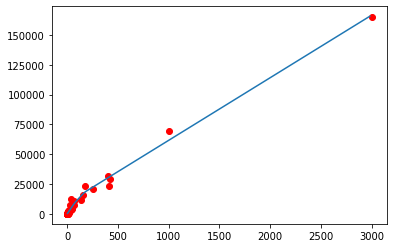

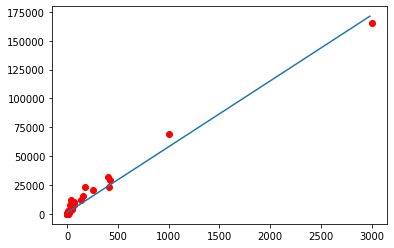

In [ ]:
print(listeResultatsRN)

import matplotlib.pyplot as plt
import numpy as np


plt.plot(range(2,3000,20),listeResultatsRN)
plt.scatter(loi_kleiber_data['Masse'], loi_kleiber_data['Metabolisme'], color='red')
plt.show()

plt.plot(range(2,3000,20),listeResultatsR)
plt.scatter(loi_kleiber_data['Masse'], loi_kleiber_data['Metabolisme'], color='red')
plt.show()




